<a href="https://colab.research.google.com/github/SarthakV7/Financial-analysis/blob/main/Finance_data_sources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pandas Data reader

In [22]:
import pandas_datareader.data as pdr
import datetime as dt

In [23]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime(2017, 1, 1)

In [24]:
facebook = pdr.get_data_yahoo('FB', start, end)
facebook.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,78.930000,77.699997,78.580002,78.449997,18177500,78.449997
2015-01-05,79.250000,76.860001,77.980003,77.190002,26452200,77.190002
2015-01-06,77.589996,75.360001,77.230003,76.150002,27399300,76.150002
2015-01-07,77.360001,75.820000,76.760002,76.150002,22045300,76.150002
2015-01-08,78.230003,76.080002,76.739998,78.180000,23961000,78.180000


### Reading using Quandl

In [ ]:
!pip install quandl
!pip install --upgrade plotly

In [1]:
from datetime import datetime
import pandas as pd
import quandl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()
# quandl.ApiConfig.api_key = ''

In [23]:
vix = quandl.get("CHRIS/CBOE_VX1") # S&P 500 volatility
vix.head()

,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Prev. Day Open Interest
Trade Date,,,,,,,,,
2005-06-20,148.3,148.3,148.3,148.3,148.3,148.3,0.0,0.0,0.0
2005-06-21,149.0,149.0,149.0,149.0,149.1,0.8,50.0,0.0,50.0
2005-06-22,148.4,148.4,148.4,148.4,148.6,-0.5,10.0,0.0,60.0
2005-06-23,149.8,150.5,149.1,150.5,151.2,2.6,61.0,0.0,121.0
2005-06-24,150.9,152.0,150.5,152.0,152.7,1.5,9.0,0.0,117.0


In [37]:
# Total volume traded
import plotly.express as px

fig = px.line(vix, y='Total Volume')
fig.show()

In [36]:
# OHLC prices
import plotly.graph_objects as go

fig = go.Figure(data=[go.Ohlc(x=vix.index,
                open=vix.Open, high=vix.High,
                low=vix.Low, close=vix.Close)])
fig.show()

### San Francisco real estate price data

In [39]:
sf = quandl.get("FMAC/HPI_SFOCA") # San Francisco real estate price
sf.head()

,Value
Date,
1975-01-31,11.211770
1975-02-28,11.223289
1975-03-31,11.338424
1975-04-30,11.540160
1975-05-31,11.699899


In [41]:
fig = px.line(sf, y='Value')
fig.show()

### Let's check apple stocks

In [42]:
df = quandl.get('WIKI/AAPL')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [48]:
df.columns[7:11]

Index(['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close'], dtype='object')

In [49]:
fig = px.line(df, y=df.columns[7:11])
fig.show()

In [44]:
fig = px.line(df, y='Split Ratio')
fig.show()

In [45]:
fig = px.line(df, y='Volume')
fig.show()

## Pandas with timeseries Data

#### Creating a datetime object and time-series dataframe

In [ ]:
!pip install --upgrade plotly

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set()

In [6]:
my_year = 1995
my_month = 5
my_day = 26
my_hour = 20
my_minute = 5
my_second = 27

In [8]:
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)
my_date_time

datetime.datetime(1995, 5, 26, 20, 5, 27)

In [34]:
first_two = [datetime(2012,1,1), datetime(2012,1,2)]
first_two

[datetime.datetime(2012, 1, 1, 0, 0), datetime.datetime(2012, 1, 2, 0, 0)]

In [35]:
dt_ind = pd.DatetimeIndex(first_two)
dt_ind

DatetimeIndex(['2012-01-01', '2012-01-02'], dtype='datetime64[ns]', freq=None)

In [36]:
data = np.random.randn(2,2)
data

array([[ 0.89749084, -1.19692992],
       [-0.66675301, -0.43236247]])

In [37]:
df = pd.DataFrame(data, dt_ind, columns=['a','b'])
df

,a,b
2012-01-01,0.897491,-1.196930
2012-01-02,-0.666753,-0.432362


#### Time Resampling

In [40]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set()

In [45]:
df = pd.read_csv('walmart_stock.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


Note that there's a column named Date which has string data, we may want to convert in into datetime object and then use as the index. Let's see how it's done.

In [46]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [47]:
# or we can simply use the following command
df = pd.read_csv('walmart_stock.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [49]:
# here, the index is a datetime index!
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

Let's see how to resample the data
Here, we neet to apply rules which are a keyword that indicate the sampling.
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

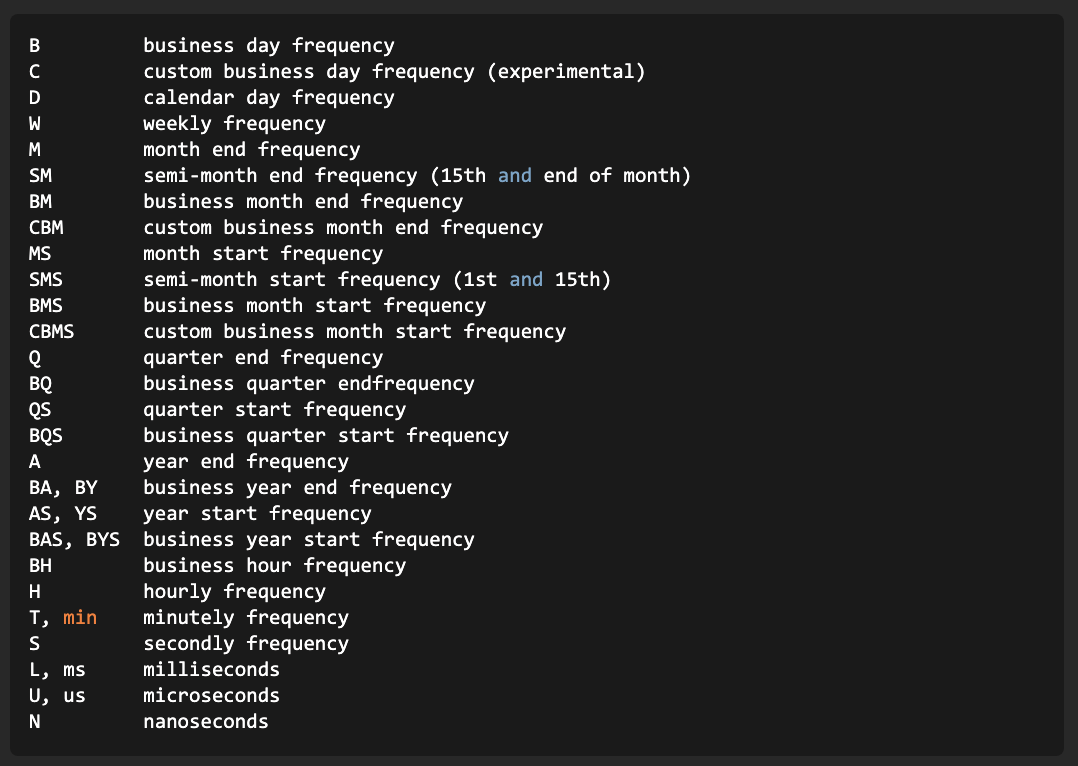

In [52]:
# Let's display the mean annual data.
df.resample(rule='A').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,67.158680,67.602120,66.786520,67.215120,9.239015e+06,59.389349
2013-12-31,75.264048,75.729405,74.843055,75.320516,6.951496e+06,68.147179
2014-12-31,77.274524,77.740040,76.864405,77.327381,6.515612e+06,71.709712
2015-12-31,72.569405,73.064167,72.034802,72.491111,9.040769e+06,68.831426
2016-12-31,69.481349,70.019643,69.023492,69.547063,9.371645e+06,68.054229


In [53]:
# Let's display the mean quarterly data.
df.resample(rule='Q').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-31,60.462903,60.807258,60.160484,60.519516,8.850221e+06,52.881839
2012-06-30,62.888889,63.400159,62.592222,63.057143,1.155795e+07,55.594392
2012-09-30,73.081587,73.549682,72.717619,73.174921,7.871587e+06,64.891949
2012-12-31,72.174678,72.623226,71.647741,72.079839,8.660958e+06,64.161672
2013-03-31,70.898834,71.393000,70.552666,71.026000,8.482003e+06,63.581880
2013-06-30,76.873906,77.417813,76.413281,76.885781,7.656086e+06,69.393600
2013-09-30,75.637969,76.030469,75.213594,75.629063,5.796625e+06,68.676662
2013-12-31,77.372656,77.805313,76.924531,77.472813,5.966927e+06,70.651242
2014-03-31,75.339344,75.802787,74.863278,75.337213,7.050402e+06,69.106983


In [54]:
# we can also create custom functions for getting the data we need. Eg, getting the first entry of annual filing.
df.resample('A').apply(lambda x:x[0])

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2013-12-31,68.930000,69.239998,68.449997,69.239998,10390800,61.879708
2014-12-31,78.720001,79.470001,78.500000,78.910004,6878000,72.254228
2015-12-31,86.269997,86.720001,85.550003,85.900002,4501800,80.624861
2016-12-31,60.500000,61.490002,60.360001,61.459999,11989200,59.289713


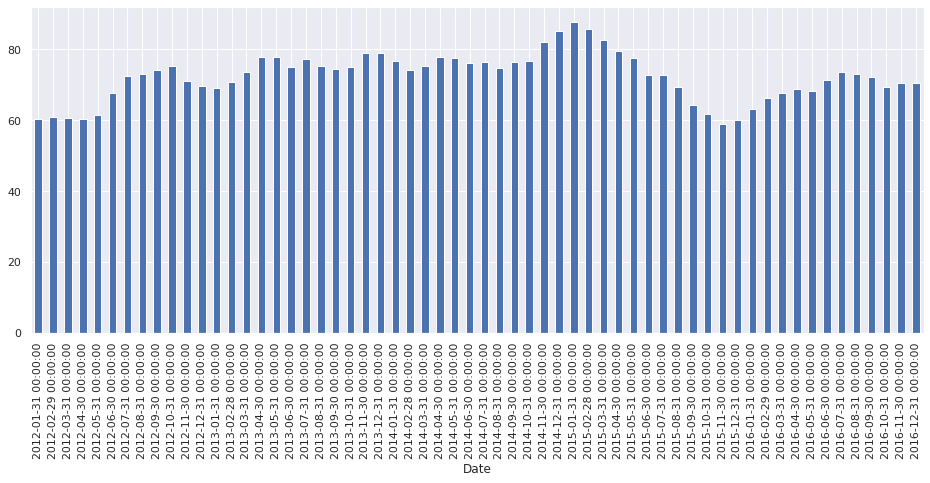

In [60]:
# Let's plot the monthly mean of Close data
df['Close'].resample('M').mean().plot(kind='bar', figsize=(16,6))
plt.show()

#### Time shifting

In [65]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [64]:
# we can shift our data up or down by some rows using shift.
df.shift(periods=1).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235
2012-01-05,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-06,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-09,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220


In [67]:
# we can also shift the entries by one month or year.
# See the entries at the beginning of january go to the end of january
df.shift(freq='M').head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [68]:
# here, we can see the entries at the beginning of 2012 go to the end of 2012
df.shift(freq='A').head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-12-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-12-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-12-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-12-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


#### Pandas rolling (moving avg.) and expanding

In [69]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


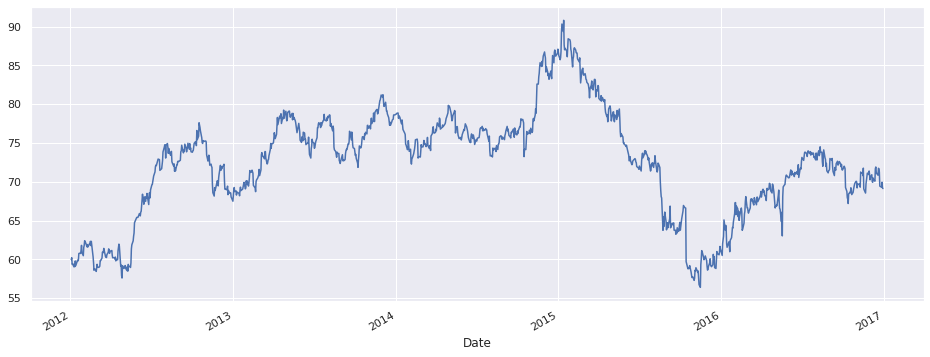

In [86]:
# fig = px.line(df, y=df['Open'])
# fig.show()
df['Open'].plot(figsize=(16,6))

In [77]:
# Let's see how to calculate the rolling mean of window size 7.
# moving average makes data less noisy.
df.rolling(7).mean().head(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


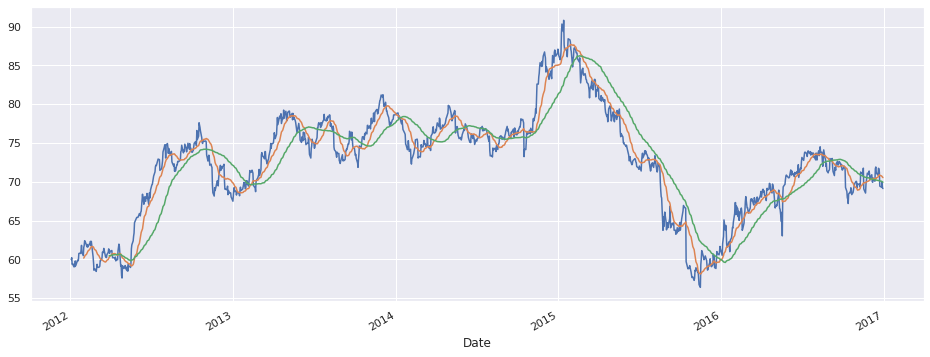

In [85]:
# We can see that the rolling mean with window-size 20 is the smoother and mean with window-size 60 is the smoothest.
df['Open'].plot(figsize=(16,6))
df.rolling(20).mean()['Open'].plot()
df.rolling(60).mean()['Open'].plot()
plt.show()

Let's see how to calculate expanding mean (mean of all the value before a date).

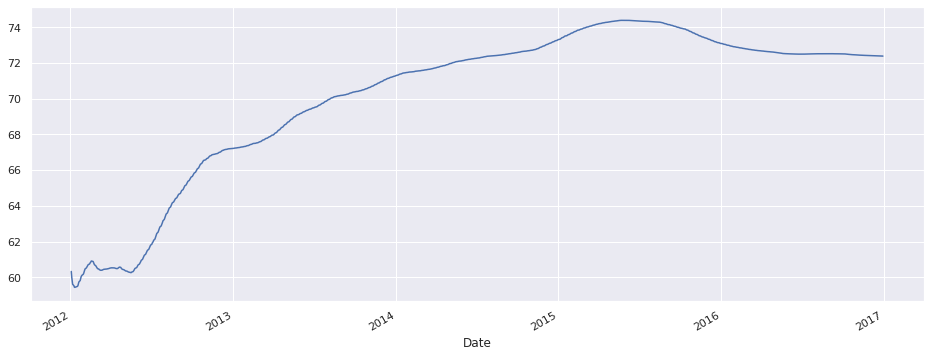

In [87]:
df['Close'].expanding().mean().plot(figsize=(16,6))

#### Bollinger's bands

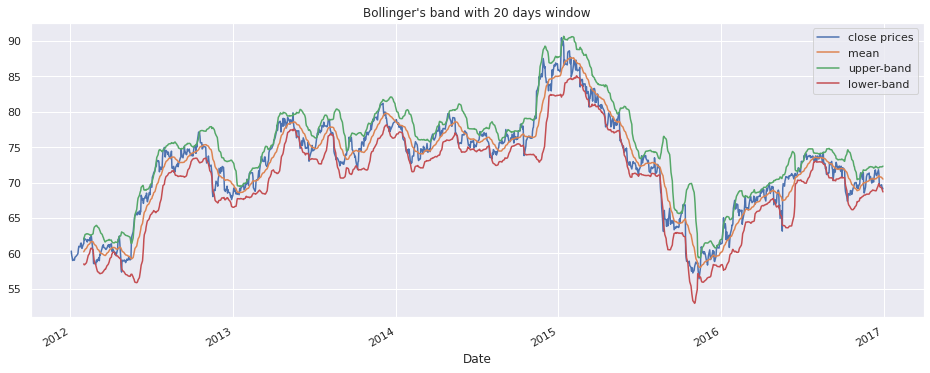

In [96]:
df['Close'].plot(figsize=(16,6), label='close prices')
mean = df['Close'].rolling(20).mean()
std = df['Close'].rolling(20).std()
mean.plot(label='mean')
(mean + 2*std).plot(label='upper-band')
(mean - 2*std).plot(label='lower-band')
plt.legend()
plt.title('Bollinger\'s band with 20 days window')
plt.show()